In [31]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_gml("galFiltered.gml").to_undirected()
G = max(nx.connected_component_subgraphs(G), key=len)

labels = nx.get_node_attributes(G, "label")

genes_in_network = labels.values()

expression_data = pd.read_csv("galExpData.csv")

genes_in_expression_data = expression_data.loc[:,["GENE"]].as_matrix().flatten()

genes_in_network = [gene for gene in genes_in_network if gene in genes_in_expression_data]

# subnetwork that is labelled
nodes_of_interest = [k for k, v in nx.get_node_attributes(G, "label").items() if v in genes_in_network]
G = G.subgraph(nodes_of_interest)

p_values = expression_data.set_index("GENE").loc[genes_in_network,["gal1RGsig", "gal4RGsig", "gal80Rsig"]].as_matrix()

In [72]:
expr = expression_data.set_index("GENE").loc[genes_in_network,["gal1RGexp", "gal4RGexp", "gal80Rexp"]].as_matrix()

In [76]:
z_scores = norm.ppf(1 - p_values)

In [81]:
np.linalg.norm(z_scores[:,:2], axis=1)

array([ 5.46580043,  3.14449653,  2.43784385,  3.37323586,  3.86596796,
        4.9849737 ,  3.9968352 ,  1.76312414,  3.97619465,  3.60793233,
        2.74674693,  3.24499931,  4.65110831,  5.86532728,  1.49273954,
        4.84614512,  4.99535598,  4.75345336,  5.04118791,  5.67904264,
        0.9139941 ,  4.01587356,  1.97693502,  6.44335252,  2.48054143,
        7.28671804,  6.86245802,  6.80348425,  6.48256711,  6.45647783,
        6.1435379 ,  6.07437261,  8.22551038,  6.43707099,  5.21714677,
        6.17848766,  6.42230925,  5.81180589,  6.15964603,  4.32554406,
        0.89620226,  6.1440872 ,  4.59083328,  4.18962024,  1.47678921,
        4.17991816,  5.4598964 ,  5.51227783,  3.69242962,  6.67583736,
        3.83343494,  1.22426459,  3.65319572,  0.06194089,  4.35205379,
        0.48387275,  3.16741202,  4.24033534,  6.8588934 ,  6.62185682,
        8.11774246,  1.80156572,  6.62616763,  6.87565679,  2.73123703,
        4.99967219,  1.97802706,  0.4283483 ,  4.02804505,  6.65

In [83]:
z_norm = z_scores[:,:2] / np.linalg.norm(z_scores[:,:2], axis=1)[:, None]

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
cosine_similarity(z_scores[:,:2])[0]

array([ 1.        ,  0.49002462,  0.92095103,  0.98713744,  0.96972094,
        0.91267934,  0.97114584,  0.64355894,  0.99991065,  0.9007592 ,
        0.06896157,  0.83393546,  0.93882291,  0.96107656,  0.71130367,
        0.8991683 ,  0.92631464,  0.92257973,  0.98245609,  0.88167943,
        0.71394165,  0.7169033 ,  0.95377542,  0.7200254 , -0.04929065,
        0.93150861,  0.82241813,  0.81213028,  0.9354142 ,  0.65762568,
        0.93176242,  0.95276037,  0.95381816,  0.97293483,  0.76328903,
        0.99230664,  0.99137776,  0.99999913,  0.57403756,  0.99849942,
        0.44002019,  0.9821078 ,  0.80488294,  0.89524611,  0.95906117,
        0.91883531,  0.89147329,  0.94324602,  0.64336397,  0.54361924,
        0.47364997,  0.67308317,  0.65164283, -0.55363931,  0.95286481,
        0.8690742 ,  0.91620928,  0.99934635,  0.99227402,  0.99233766,
        0.97762353,  0.6808116 ,  0.9792107 ,  0.90720629,  0.38844957,
        0.97834676,  0.56892827,  0.86272074,  0.97378192,  0.91

In [77]:
zip(expr[:,0], p_values[:,0], z_scores[:,0])

[(-0.154, 0.00091177000000000001, 3.1175613321032247),
 (0.17399999999999999, 0.00087295000000000005, 3.1303636970012998),
 (-0.050000000000000003, 0.30843999999999999, 0.50027706643100589),
 (0.078, 0.072654999999999997, 1.4562989343684098),
 (0.13100000000000001, 0.0017853999999999999, 2.9137812706780086),
 (0.245, 9.8446000000000006e-06, 4.2683864610662985),
 (0.16200000000000001, 0.0013638999999999999, 2.9968554766186264),
 (-0.14099999999999999, 0.039574999999999999, 1.7556394013294025),
 (0.16500000000000001, 0.013072, 2.2240660599394269),
 (0.044000000000000004, 0.28550999999999999, 0.56654993154207312),
 (0.10800000000000001, 0.0091669999999999998, 2.3588027099934479),
 (0.16899999999999998, 0.0012872999999999999, 3.0144330820764194),
 (0.193, 7.0526999999999997e-05, 3.8063127412374569),
 (-0.374, 2.7302999999999999e-06, 4.5462660654686058),
 (0.059000000000000004, 0.60109999999999997, -0.25619534871324839),
 (0.223, 1.1824999999999999e-05, 4.2273116477932273),
 (0.300999999999

In [3]:
z_scores.shape

(247, 3)

In [4]:
eps = 1e-8

z_scores -= (z_scores.min(axis=0) + eps)

In [5]:
z_scores = z_scores[:, 0, None]
Z = z_scores.dot(z_scores.transpose())

A = np.array(nx.adjacency_matrix(G).todense())

AZ = A * Z

In [6]:
N = nx.number_of_nodes(G)

# A = np.array(nx.adjacency_matrix(G).todense())
DZ = AZ.sum(axis=0)

W = (np.identity(N) + AZ.dot(np.diag(1./DZ))) / 2

def matrix_multiply(M, n):
    if n == 0:
        return np.identity(M.shape[0])
    if n % 2 == 0:
        m = matrix_multiply(M, n/2).dot(matrix_multiply(M, n/2))
    else: m = M.dot(matrix_multiply(M, n-1))
    m[m < 0] = 0
    return m / m.sum(axis=0)

In [7]:
n = 10

# targets = matrix_multiply(W, n=50)
targets = matrix_multiply(W, n=n)

D_n = targets.sum(axis=1)

I = np.identity(N)

In [8]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Lambda
# from keras.layers.merge import Dot
# from keras.regularizers import l2

import keras.backend as K

# from keras.models import Sequential

Using TensorFlow backend.


In [9]:
degree_sort = D_n.argsort()[::-1]

In [10]:
ranked_nodes = np.array([np.where(degree_sort==x)[0][0] for x in range(N)])

In [11]:
import powerlaw

In [71]:
p_values[:,2]

array([  1.12290000e-02,   5.99660000e-03,   7.20070000e-02,
         1.66430000e-05,   5.03230000e-02,   5.94960000e-01,
         5.74480000e-03,   2.24510000e-01,   2.81190000e-01,
         6.94110000e-01,   1.77710000e-01,   2.75550000e-03,
         1.36530000e-01,   4.86330000e-05,   1.43440000e-01,
         1.17730000e-07,   7.51240000e-04,   3.28290000e-02,
         2.10590000e-01,   9.05810000e-01,   1.39150000e-01,
         2.08360000e-05,   3.75720000e-01,   1.54890000e-07,
         5.41550000e-01,   4.23150000e-13,   2.50560000e-02,
         1.53570000e-03,   1.25890000e-02,   6.44070000e-03,
         3.89800000e-09,   1.22670000e-05,   1.64380000e-03,
         1.42870000e-12,   3.61980000e-13,   4.42160000e-01,
         7.49440000e-01,   1.72240000e-01,   8.67350000e-12,
         1.31040000e-05,   9.53960000e-01,   1.83610000e-02,
         4.47930000e-05,   2.47110000e-05,   1.72390000e-01,
         9.45000000e-02,   6.89310000e-06,   1.64240000e-05,
         1.38010000e-01,

In [70]:
z_scores[:,2]

array([  2.28253116e+00,   2.51234434e+00,   1.46100525e+00,
         4.14973528e+00,   1.64172986e+00,  -2.40322827e-01,
         2.52744445e+00,   7.57049846e-01,   5.79310028e-01,
        -5.07534266e-01,   9.24127379e-01,   2.77554071e+00,
         1.09604290e+00,   3.89731269e+00,   1.06499101e+00,
         5.16891258e+00,   3.17420410e+00,   1.84075138e+00,
         8.04375753e-01,  -1.31538662e+00,   1.08414616e+00,
         4.09800849e+00,   3.16741179e-01,   5.11739769e+00,
        -1.04339415e-01,   7.15345392e+00,   1.95900672e+00,
         2.96050012e+00,   2.23866072e+00,   2.48703148e+00,
         5.77281072e+00,   4.21904436e+00,   2.93948329e+00,
         6.98456044e+00,   7.17484994e+00,   1.45495080e-01,
        -6.72728551e-01,   9.45350431e-01,   6.72677040e+00,
         4.20413715e+00,  -1.68452631e+00,   2.08884143e+00,
         3.91719307e+00,   4.05834367e+00,   9.44762776e-01,
         1.31354312e+00,   4.34723895e+00,   4.15276641e+00,
         1.08930366e+00,

In [65]:
pop = np.abs(z_scores[:,2].copy())
pop[pop<0] = 0

In [67]:
pop

array([  2.28253116e+00,   2.51234434e+00,   1.46100525e+00,
         4.14973528e+00,   1.64172986e+00,   2.40322827e-01,
         2.52744445e+00,   7.57049846e-01,   5.79310028e-01,
         5.07534266e-01,   9.24127379e-01,   2.77554071e+00,
         1.09604290e+00,   3.89731269e+00,   1.06499101e+00,
         5.16891258e+00,   3.17420410e+00,   1.84075138e+00,
         8.04375753e-01,   1.31538662e+00,   1.08414616e+00,
         4.09800849e+00,   3.16741179e-01,   5.11739769e+00,
         1.04339415e-01,   7.15345392e+00,   1.95900672e+00,
         2.96050012e+00,   2.23866072e+00,   2.48703148e+00,
         5.77281072e+00,   4.21904436e+00,   2.93948329e+00,
         6.98456044e+00,   7.17484994e+00,   1.45495080e-01,
         6.72728551e-01,   9.45350431e-01,   6.72677040e+00,
         4.20413715e+00,   1.68452631e+00,   2.08884143e+00,
         3.91719307e+00,   4.05834367e+00,   9.44762776e-01,
         1.31354312e+00,   4.34723895e+00,   4.15276641e+00,
         1.08930366e+00,

In [66]:
hist, edges = np.histogram(pop, bins=10)

ValueError: range parameter must be finite.

In [ ]:
hist

In [61]:
edges

array([  1.25331447e-03,   6.54001354e-01,   1.30674939e+00,
         1.95949743e+00,   2.61224547e+00,   3.26499351e+00,
         3.91774155e+00,   4.57048959e+00,   5.22323763e+00,
         5.87598567e+00,   6.52873371e+00])

In [62]:
# result = powerlaw.Fit(D_n)
result = powerlaw.Fit(hist)

Calculating best minimal value for power law fit


In [63]:
gamma = result.alpha

In [64]:
gamma

7.6447876906071528

In [13]:
beta = 1. / (gamma - 1)

In [14]:
R = 2 * beta * np.log(range(1, N + 1)) + 2 * (1 - beta) * np.log(N) 
R = R[ranked_nodes]

In [54]:
T = 0.5
degrees = np.array(nx.degree(G).values())
m = degrees.mean() / 2
r_t = R.max()
disk_R = r_t - 2 * np.log((2 * T * (1 - np.exp(- 0.5 * (1 - beta) * r_t))) / (m * (1 - beta) * np.sin(np.pi * T)))

In [55]:
disk_R

10.546712187127579

In [164]:
disk_R = 0

In [165]:
def cosh(x):
    return (K.exp(x) + K.exp(-x)) / 2

def sinh(x):
    return (K.exp(x) - K.exp(-x)) / 2

def arccosh(x):
    return K.log(x + K.sqrt(x + 1) * K.sqrt(x - 1))

def hyperbolic_distance(args):
    
    r1, r2, theta1, theta2  = args
    
    # compute hyperbolic distance 
    pi = K.constant(np.pi)
    delta = pi - K.abs(pi - K.abs(theta1 - theta2))
    d = cosh(r1) * cosh(r2) - sinh(r1) * sinh(r2) * K.cos(delta)
    d = K.maximum(1.0, d)
    d = arccosh(d)
    
    return d

def compute_probability(d):
    return K.sigmoid((disk_R - d) / (2 * T))

In [166]:
def generator(batch_size, num_pos, num_neg, eps=1e-8):
    
    while True:
        
        nodes = np.random.choice(N, size=batch_size)
#         print nodes
        
        # positive samples
        pos = np.array([np.random.choice(N, p=targets[:,n], size=num_pos) for n in nodes]).flatten()
#         print pos
        
        # negative samples 
        neg = np.array([np.random.choice(np.where(targets[:,n] < eps)[0], size=num_neg) for n in nodes]).flatten()
#         print neg
        
        in1 = np.array([I[n] for n in nodes for i in range(num_pos + num_neg) ])
#         print [n for n in nodes for i in range(num_pos + num_neg)]
#         print in1.argmax(axis=1)
        r1 = np.array([R[n] for n in nodes for i in range(num_pos + num_neg) ])
#         print r1
    
        in2 = I[np.append(pos, neg)]
#         print np.append(pos, neg)
#         print in2.argmax(axis=1)
        r2 = R[np.append(pos, neg)]
#         print r2
        
#         print np.append(np.ones(num_pos), np.zeros(num_neg))
        targs = np.array([np.append(np.ones(num_pos), np.zeros(num_neg)) for i in range(batch_size)]).flatten()
#         print targs
        
        yield [r1, r2, in1, in2], targs

In [167]:
def random_pos_neg_generator(batch_size, neg_bias=0.6):
    
    while True:
        
        nodes = np.random.choice(N, size=batch_size, replace=True)
        
        targs = np.random.choice(2, p=[neg_bias, 1-neg_bias], size=batch_size)
        
        nodes2 = np.array([np.random.choice(N, p=targets[:,nodes[i]]) if targs[i] == 1 else
                          np.random.choice(np.where(targets[:,nodes[i]] < eps)[0]) for i in range(batch_size)])
        
        yield [I[nodes], I[nodes2]], targs

In [168]:
batch_size = 1000
num_pos = 1
num_neg = 5

In [126]:
# gen = generator(batch_size, num_pos, num_neg)

In [169]:
gen = random_pos_neg_generator(batch_size)

In [129]:
# [r1, r2, in1, in2], t = gen.next()

In [170]:
# contruct model to determine angular coordinates from one hot representation of node
x = Input(shape=(N,))
y = Dense(128, activation="sigmoid")(x)
y = Dense(2, activation="linear")(y)
r = Lambda(lambda x : x[:,:1])(y)
theta = Lambda(lambda x : x[:,1:])(y)

angular_embedder = Model(x, [r, theta])

In [171]:
# embedder of two nodes
# r1 = Input(shape=(1,))
# r2 = Input(shape=(1,))

x1 = Input(shape=(N,))
x2 = Input(shape=(N,))

r1, theta1 = angular_embedder(x1)
r2, theta2 = angular_embedder(x2)

hyperbolic_distances = Lambda(hyperbolic_distance, output_shape=(1,))([r1, r2, theta1, theta2])
probabilities = Lambda(compute_probability, output_shape=(1,))(hyperbolic_distances)

probability_model = Model([x1, x2], probabilities)
probability_model.compile(loss="binary_crossentropy", optimizer="adam")

In [172]:
from keras_tqdm import TQDMNotebookCallback

In [173]:
tqdm = TQDMNotebookCallback(leave_outer=True, leave_inner=False)

In [174]:
probability_model.fit_generator(gen, steps_per_epoch=100, epochs=100, verbose=0, 
                                callbacks=[tqdm])

In [175]:
r, theta = angular_embedder.predict(I)

In [176]:
X = np.column_stack([R[:, None] * np.cos(theta), R[:, None] * np.sin(theta)]) 

In [178]:
def hyperbolic_distance_numpy(r1, theta1, r2, theta2):
    
    delta = np.pi - np.abs(np.pi - np.abs(theta1 - theta2))
    d = np.cosh(2 * r1) * np.cosh(2 * r2) - np.sinh(2 * r1) * np.sinh(2 * r2) * np.cos(delta)
    d = np.maximum(1.0, d)
    d = 0.5 * np.arccosh(d)
    
    if np.array_equal(r1, r2) and np.array_equal(theta1, theta2):
        d = 0
    
    return d

D = np.array([[hyperbolic_distance_numpy(r1, theta1, r2, theta2) for r2, theta2 in zip(r, theta)]
             for r1, theta1 in zip(r, theta)])

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(metric="precomputed", eps=10)

dbscan.fit(D)

c = dbscan.labels_

In [179]:
for i in range(c.max()):
    H = G.subgraph(np.where(c == i)[0])
    print nx.number_connected_components(H)

In [151]:
# c = [1] * N

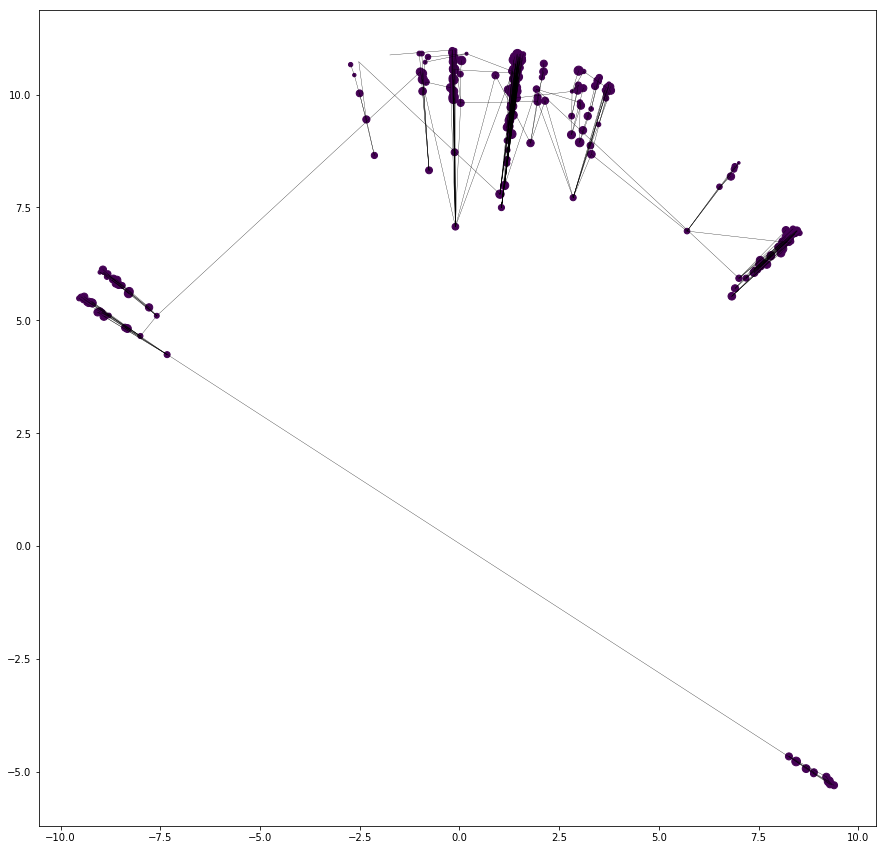

In [180]:
plt.figure(figsize=(15, 15))
l = 15
# for label, i, j in zip(z_values, X[:l, 0], X[:l, 1]):
#     plt.annotate(
#         label,
#         xy=(i, j), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

nodes = np.array(G.nodes())
for n1, n2 in G.edges():
    i, = np.where(nodes == n1)
    j, = np.where(nodes == n2)
    plt.plot(X[(i, j), 0], X[(i, j), 1], c="k", 
             linewidth = 0.3)

plt.scatter(X[:,0], X[:,1], c = c, s = 10 * z_scores)